In [0]:
#Research references:
#1) Dry/wet cough classification: https://link.springer.com/article/10.1007/s10439-013-0741-6
#2) Pneumonia classification: https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=6987276
#3) https://espace.library.uq.edu.au/data/UQ_344963/s41943203_phd_submission.pdf?Expires=1585601065&Key-Pair-Id=APKAJKNBJ4MJBJNC6NLQ&Signature=Lnpf6wT8rkozSh9av7U9nGuC7WAH6KuI2Cj3Y7G366gkGlh8D-Ie1Kc~TyBAUu~uMsVltleJcSv3p6TCm6HdFnhpyoTgLcYh6eFfvQwIUqbk1Bf4JZldgB~BDKUOwY1G0pA-HoKjvIAu3avO98SMO35upakm9OEBByd4nC9aXsjKRThd6bTpq1qIuuD9gh1l5FaM6hNRB0c2lCf4Q3adx7C3FW0NMwdWhcuF45A9f~dO3zTWWSQamoo5Otc-PHMMt96TetNcML~jy9ghgJeCPY6DJLUIwQAt03fENBluS~TjTJ17WD~n51xiRofb94fEJHoRHh0d-430LLwr7BX4IA__

In [2]:
!pip install pydub

In [3]:
!pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5887 sha256=c7fa1b63313839507b441873c9ee2efe815c98cc04ad654882678db9c3033cd7
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [4]:
!pip install pysptk

     |████████████████████████████████| 419kB 5.0MB/s 
  Created wheel for pysptk: filename=pysptk-0.1.18-cp36-cp36m-linux_x86_64.whl size=950218 sha256=fd17555caf9ecee7ceb0115859832e26f432e981ecbcc046d5168214a69832a1
  Stored in directory: /root/.cache/pip/wheels/c7/96/d2/a163240019c59504402fab713af259026af81a99dea943404a
Successfully built pysptk


In [0]:
import numpy as np
import os
#import pywt #wavelets
from pydub import AudioSegment
from pydub.silence import split_on_silence
from pydub.utils import mediainfo
from pydub.playback import play
import matplotlib.pyplot as plt
#import seaborn as sn
import python_speech_features as spe_feats
import pandas as pd
from scipy.stats import kurtosis, skew
from scipy.signal import lfilter
import librosa
import pysptk
import math
import sys
import random
random.seed(1)
#settings
import config


## Reading recordings

In [0]:
all_s=[]
all_label=[]
all_id=[]
all_fs=[]

In [0]:
import sys  
sys.path.insert(0, '/content/config.py') #/content/config.py

In [4]:
#Read wav data set

if config.featExtr_skip is False:
    print("Readings wavs...")

    #only list files in FOLDER_PATH directory
    wav_files = [f for f in os.listdir(config.FOLDER_PATH) if os.path.isfile(os.path.join(config.FOLDER_PATH, f))]
    for file_name in wav_files:
    
        fname_noExt = os.path.splitext(file_name)[0] #file name without extension
    
        #full path file name
        full_fname = config.FOLDER_PATH+file_name
        print(full_fname)
    
        # load audio
        s = AudioSegment.from_wav(full_fname)
        print(full_fname)
        all_s.append(s)
        #sampling rate:
        info = mediainfo(full_fname)
        fs = float(info['sample_rate'])
        all_fs.append(fs)
    
        #get ID of recording
        ID = fname_noExt.split('-')[-2] #for the current type of naming
        #print(file_name)
        #print(ID)
        all_id.append(ID)
        words = ['covid', 'suspect', 'healthy']
        for l in words:
            if l in fname_noExt:
                label = l
        #get label
        #label = fname_noExt.split('-')[-1] #for the current type of naming #Change this for updated data 
        #print(label)
        all_label.append(label)

Readings wavs...
data/YT_set/edited_wavs/1585980696440_sentence_healthy_f_45_e9a9bfb1-300a-404a-9dae-60f0c798a1e4.wav
data/YT_set/edited_wavs/1585980696440_sentence_healthy_f_45_e9a9bfb1-300a-404a-9dae-60f0c798a1e4.wav
data/YT_set/edited_wavs/1586190780461_breath_suspect_m_29_9fa75acd-a59e-4116-b374-cc112ca9801e.wav
data/YT_set/edited_wavs/1586190780461_breath_suspect_m_29_9fa75acd-a59e-4116-b374-cc112ca9801e.wav
data/YT_set/edited_wavs/1586169776140_sentence_healthy_f_48_3b080916-a3a0-49b2-85a0-139b7713ae62.wav
data/YT_set/edited_wavs/1586169776140_sentence_healthy_f_48_3b080916-a3a0-49b2-85a0-139b7713ae62.wav
data/YT_set/edited_wavs/1586059457781_sentence_healthy_m_52_0f56abb0-968e-4824-a9a1-6c7534d97a78.wav
data/YT_set/edited_wavs/1586059457781_sentence_healthy_m_52_0f56abb0-968e-4824-a9a1-6c7534d97a78.wav
data/YT_set/edited_wavs/1585980696440_cough_healthy_f_45_e9a9bfb1-300a-404a-9dae-60f0c798a1e4.wav
data/YT_set/edited_wavs/1585980696440_cough_healthy_f_45_e9a9bfb1-300a-404a-9dae-

In [5]:
label

'healthy'

In [6]:
len(wav_files) # Total 36 files uploaded 

23

Listening to some of the audios

In [0]:
if config.featExtr_skip is False:
    np.where(np.array(all_label)=='healthy')

In [0]:
if config.featExtr_skip is False:
    np.where(np.array(all_label)=='covid')

In [0]:
if config.featExtr_skip is False:
    np.where(np.array(all_label)=='suspect')

In [0]:
if config.featExtr_skip is False:
    s=all_s[15]
    s

## Feature extraction

In [0]:
!pip install git+https://github.com/r9y9/pysptk

  Cloning https://github.com/r9y9/pysptk to /tmp/pip-req-build-6u74m302
  Running command git clone -q https://github.com/r9y9/pysptk /tmp/pip-req-build-6u74m302
  Running command git submodule update --init --recursive -q
  Created wheel for pysptk: filename=pysptk-0.1.19+dbc194c-cp36-cp36m-linux_x86_64.whl size=951981 sha256=67fb69d07f780bfa92ef3ec6cf2c20020c8ef7e5dc2636e0a12aad767abfd0c0
  Stored in directory: /tmp/pip-ephem-wheel-cache-3pwu12so/wheels/2a/28/31/a8ae9718b5bd5b21d46703b1d34d3c87f4cf4e604e2413607b
Successfully built pysptk
  Found existing installation: pysptk 0.1.18
    Uninstalling pysptk-0.1.18:
      Successfully uninstalled pysptk-0.1.18


In [27]:
import numpy as np
np.shape(all_label)


(58,)

In [28]:
all_label #Fix this - should contain - healthy , covid, suspect - eventually classify suspect VS covid

['healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'covid',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'suspect',
 'covid',
 'healthy',
 'healthy',
 'healthy',
 'suspect',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'suspect',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'suspect',
 'suspect',
 'covid',
 'healthy',
 'healthy']

In [11]:
import featureExtractionFunctions as featExtrLib
import pysptk
if config.featExtr_skip is False:

    feats = featExtrLib.feature_extraction_Step(all_s,all_id,all_label)
    
       
#Lenght of all_s, all_id and all_label must be the same
       #Lenght is 36, of a ll arguments 

High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass filtering...
Computing features...
High-pass 

In [12]:
feats.shape

(3501, 25)

## Load  (or store) features 

In [0]:
feats_fname = 'feats_df.pkl'

if config.featExtr_skip is False:
    #Store feature df
    feats.to_pickle(feats_fname)
else:
    #Load feature df
    feats = pd.read_pickle(feats_fname)

## Pre-processing of features

In [0]:
feats2 = featExtrLib.processingNaNvalues(feats)

In [15]:
feats

,Id,kurt,logEnergy,zcr,F0,skewness,label,entropy,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,F1,F2,F3,F4
0,9dae,-3.000000,-15.653560,0.000000,0.0,0.000000,healthy,0.000000,-36.043653,0.000000,0.000000,0.000000,-5.317066e-14,0.000000,-3.432169e-14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
1,9dae,-3.000000,-15.653560,0.000000,0.0,0.000000,healthy,0.000000,-36.043653,0.000000,0.000000,0.000000,-5.317066e-14,0.000000,-3.432169e-14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
2,9dae,74.496203,7.013444,0.007519,0.0,-0.053929,healthy,0.000000,22.106819,-55.298211,-28.633744,-12.482189,-1.831654e+01,-3.612546,-1.220201e+01,-1.757603,-10.025304,-2.662720,-9.402442,-3.606080,-7.927589,NaN,NaN,NaN,NaN
3,9dae,124.891794,5.753564,0.005013,0.0,0.357355,healthy,0.000000,19.219481,-55.226196,-28.885721,-13.303920,-1.973971e+01,-5.508226,-1.425100e+01,-3.560505,-11.264630,-2.668989,-8.259321,-2.026840,-6.549228,NaN,NaN,NaN,NaN
4,9dae,-3.000000,-15.653560,0.000000,0.0,0.000000,healthy,0.000000,-36.043653,0.000000,0.000000,0.000000,-5.317066e-14,0.000000,-3.432169e-14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,a9a1,3.806634,3.194136,0.463659,0.0,0.871429,healthy,8.643856,13.243207,-11.635831,19.492475,-19.647588,1.643636e+01,-51.572527,-5.944072e+00,3.562196,7.357957,-4.385455,-34.615137,-32.429208,20.971276,NaN,NaN,NaN,NaN
3497,a9a1,1.896420,2.751819,0.411028,0.0,0.662177,healthy,8.643856,12.149659,-12.676209,18.821759,-18.585478,2.509188e+01,-54.208612,-9.916315e+00,13.754496,11.717158,-6.106681,-29.804491,-11.296234,16.664628,NaN,NaN,NaN,NaN
3498,a9a1,6.896554,2.908995,0.390977,0.0,0.463840,healthy,8.643856,12.603628,-8.418572,25.380305,-14.098784,9.767607e+00,-66.084484,-1.221492e+00,25.805327,11.584334,-10.279126,-15.505048,-27.169752,8.331873,NaN,NaN,NaN,NaN
3499,a9a1,4.042405,2.503102,0.413534,0.0,0.376938,healthy,8.643856,11.609834,-12.090830,18.385291,-17.250677,1.286420e+01,-56.138200,-4.037472e+00,18.927159,12.880353,-5.300275,-13.042858,-19.407809,11.005639,NaN,NaN,NaN,NaN


In [0]:
label_dict = featExtrLib.createLabelDict_addLabel2df(feats2)
mean_std_feats = featExtrLib.frame_mean_std_chunk_modeling (feats2,label_dict)

In [17]:
mean_std_feats.shape

(355, 49)

## Model training

In [0]:
X_train = mean_std_feats.drop(['label','Id','subIdx'], 1).copy()
y_train =  mean_std_feats['label'].copy()

ID_train = mean_std_feats['Id']

#ID_train.size --- Check the y_train labels 

In [19]:
y_train.unique()

array(['suspect', 'healthy', 'covid'], dtype=object)

In [20]:
X_train

,kurt_m,logEnergy_m,zcr_m,F0_m,skewness_m,entropy_m,mfcc_0_m,mfcc_1_m,mfcc_2_m,mfcc_3_m,mfcc_4_m,mfcc_5_m,mfcc_6_m,mfcc_7_m,mfcc_8_m,mfcc_9_m,mfcc_10_m,mfcc_11_m,mfcc_12_m,F1_m,F2_m,F3_m,F4_m,kurt_std,logEnergy_std,zcr_std,F0_std,skewness_std,entropy_std,mfcc_0_std,mfcc_1_std,mfcc_2_std,mfcc_3_std,mfcc_4_std,mfcc_5_std,mfcc_6_std,mfcc_7_std,mfcc_8_std,mfcc_9_std,mfcc_10_std,mfcc_11_std,mfcc_12_std,F1_std,F2_std,F3_std,F4_std
0,7.487398,3.254538,0.415539,24.143263,0.276044,8.633343,13.316072,-23.210690,12.268731,-3.097449,30.147028,1.061579,12.795347,-7.932694,3.361835,-19.220120,-10.021341,-16.532146,0.342396,0.342396,0.342396,0.342396,0.342396,7.107979,1.378085,0.052270,30.033659,0.952407,2.991081e-02,3.232670,8.054590,16.344912,22.460246,13.796380,8.644877,7.764616,13.024584,8.941866,19.164721,18.367054,10.581726,9.906564,9.906564,9.906564,9.906564,9.906564
1,7.778342,2.756529,0.441604,16.441803,0.341112,8.633888,12.261544,-23.963859,-0.228988,-27.514992,24.579247,1.770780,12.111861,-4.388509,1.933917,-38.021059,-21.664652,1.343692,-12.415550,-12.415550,-12.415550,-12.415550,-12.415550,3.611644,1.622843,0.028747,25.119133,0.546734,1.376022e-02,3.753590,5.061426,3.950364,14.544363,13.684918,4.883532,5.381695,10.379499,8.670674,10.651749,9.374612,10.106491,11.631959,11.631959,11.631959,11.631959,11.631959
2,8.272703,2.009377,0.460902,0.000000,0.078827,8.599825,10.554367,-30.706988,6.052967,-11.502601,-19.644089,-33.873367,-9.583506,-2.749914,19.409714,-8.591413,-0.251231,-2.851915,5.054101,5.054101,5.054101,5.054101,5.054101,3.413768,1.355535,0.025887,0.000000,0.406483,5.264148e-02,3.137090,3.520608,8.729559,6.456737,16.094107,29.714220,16.027137,11.172731,16.365669,11.355352,10.678119,5.884397,9.491288,9.491288,9.491288,9.491288,9.491288
3,16.138859,5.341791,0.455639,56.297680,0.093539,8.643856,18.228545,-21.824235,-3.883372,-49.840205,57.018893,27.567263,9.696413,-37.611497,25.752038,-42.649478,-34.146931,14.131742,-28.225636,-28.225636,-28.225636,-28.225636,-28.225636,9.131717,0.635569,0.024423,28.261805,0.575494,1.776357e-15,1.498783,9.157223,7.049637,16.663458,7.913468,18.314958,4.969307,17.873812,20.135266,15.117692,12.740643,9.518290,5.606985,5.606985,5.606985,5.606985,5.606985
4,6.013277,2.533600,0.473684,0.000000,-0.076047,8.629439,11.788646,-36.313286,-12.760575,-30.383180,11.881278,-1.426010,3.807452,-10.524707,5.859927,-23.079763,-12.491269,2.837330,-12.231762,-12.231762,-12.231762,-12.231762,-12.231762,2.044090,0.890428,0.027614,0.000000,0.237062,1.938428e-02,2.050983,6.318859,4.887413,9.001948,28.238184,27.656061,12.539863,13.134631,23.081270,12.955017,9.619913,11.177006,7.884767,7.884767,7.884767,7.884767,7.884767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,11.921577,2.617082,0.422807,0.000000,-0.097656,7.745097,11.979889,-35.637835,-12.396089,-23.329157,-5.618912,-24.009019,-11.429958,-8.653911,-13.644327,-2.376830,-9.348086,-6.784202,3.796239,3.796239,3.796239,3.796239,3.796239,10.234004,2.068076,0.094723,0.000000,0.795525,1.598664e+00,4.754235,7.618878,3.670433,13.263026,12.346275,9.793712,5.641880,7.715234,9.470948,6.940885,11.442204,13.338935,12.845447,12.845447,12.845447,12.845447,12.845447
351,5.683850,3.031414,0.430326,0.000000,-0.108533,8.584561,12.893581,-29.518548,9.673216,-2.808057,-15.152383,4.970744,-11.303872,-40.637660,20.856397,-14.108397,11.416597,-0.283455,0.629552,0.629552,0.629552,0.629552,0.629552,1.342879,1.411308,0.031920,0.000000,0.509826,1.164686e-01,3.236675,8.207434,13.450919,11.917909,7.435705,10.285392,15.423768,26.137803,19.249713,9.016201,7.068626,8.996079,3.526151,3.526151,3.526151,3.526151,3.526151
352,5.503384,2.011310,0.436591,0.000000,0.178825,8.422963,10.561135,-37.505530,-5.705017,-12.544108,-18.047612,-4.276282,0.332355,-11.281375,13.027097,-12.810990,-0.018912,-15.864451,-8.814279,-8.814279,-8.814279,-8.814279,-8.814279,1.0740

In [21]:
X_train.shape

(355, 46)

In [22]:
y_train.shape

(355,)

In [0]:
import modelTrainingFunctions as modelTrainLib

pred_probs = modelTrainLib.modelTraining(X_train,y_train,ID_train)

In [24]:
pred_probs

,ID,covid,healthy,suspect
0,81be,1.123231e-94,1.000000e+00,NaN
1,81be,2.201075e-68,1.000000e+00,NaN
2,81be,2.098878e-79,3.535806e-17,NaN
3,81be,1.752598e-37,1.000000e+00,NaN
4,81be,9.671385e-34,1.000000e+00,NaN
...,...,...,...,...
350,bf5d,2.552522e-80,9.999915e-01,NaN
351,bf5d,7.066177e-84,9.944494e-01,NaN
352,bf5d,3.158577e-73,5.208731e-61,NaN
353,bf5d,1.081590e-43,2.701797e-01,NaN


In [0]:
mean_pred_probs = modelTrainLib.get_predClass_per_audio(pred_probs, label_dict)




#Change here 

## Evaluation

In [26]:
import classifEvaluationFunctions as evalLib
evalLib.evaluation_Step(mean_pred_probs)
    

Scores:
Accuracy: 0.750000
Precision: 0.250000
F1-score: 0.285714
Recall: 0.333333

Confusion matrix
pred_class  healthy  All
label                   
covid             1    1
healthy           9    9
suspect           2    2
All              12   12


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
#Test data set

mean_pred_probs

,ID,covid,healthy,suspect,pred_class,label
0,81be,1.851852e-02,0.738771,NaN,healthy,suspect
1,85a0,3.521368e-30,0.707561,NaN,healthy,healthy
2,9067,3.921928e-02,0.667245,NaN,healthy,healthy
3,9122,1.014487e-17,1.000000,NaN,healthy,healthy
4,9458,3.404701e-15,0.577781,NaN,healthy,healthy
5,9ad9,7.903403e-41,0.709452,NaN,healthy,healthy
6,9dae,2.307692e-01,0.762368,NaN,healthy,healthy
7,a1a6,1.559700e-24,0.969697,NaN,healthy,healthy
8,a311,NaN,1.000000,9.470925e-08,healthy,covid
9,a9a1,1.787282e-21,0.545619,NaN,healthy,healthy


In [23]:
# y_test.shape - (36,)
#X_test.shape - (36, 2)

(36, 2)

In [22]:
#X_train.shape -(465, 46) 
#y_train.shape -(465,)

(465,)

In [28]:
X_train # 46 columns , X_test also should be with 46 columns

,kurt_m,logEnergy_m,zcr_m,F0_m,skewness_m,entropy_m,mfcc_0_m,mfcc_1_m,mfcc_2_m,mfcc_3_m,mfcc_4_m,mfcc_5_m,mfcc_6_m,mfcc_7_m,mfcc_8_m,mfcc_9_m,mfcc_10_m,mfcc_11_m,mfcc_12_m,F1_m,F2_m,F3_m,F4_m,kurt_std,logEnergy_std,zcr_std,F0_std,skewness_std,entropy_std,mfcc_0_std,mfcc_1_std,mfcc_2_std,mfcc_3_std,mfcc_4_std,mfcc_5_std,mfcc_6_std,mfcc_7_std,mfcc_8_std,mfcc_9_std,mfcc_10_std,mfcc_11_std,mfcc_12_std,F1_std,F2_std,F3_std,F4_std
0,7.487398,3.254538,0.415539,24.143263,0.276044,8.633343,13.316072,-23.210690,12.268731,-3.097449,30.147028,1.061579,12.795347,-7.932694,3.361835,-19.220120,-10.021341,-16.532146,0.342396,0.342396,0.342396,0.342396,0.342396,7.107979,1.378085,0.052270,30.033659,0.952407,2.991081e-02,3.232670,8.054590,16.344912,22.460246,13.796380,8.644877,7.764616,13.024584,8.941866,19.164721,18.367054,10.581726,9.906564,9.906564,9.906564,9.906564,9.906564
1,7.778342,2.756529,0.441604,16.441803,0.341112,8.633888,12.261544,-23.963859,-0.228988,-27.514992,24.579247,1.770780,12.111861,-4.388509,1.933917,-38.021059,-21.664652,1.343692,-12.415550,-12.415550,-12.415550,-12.415550,-12.415550,3.611644,1.622843,0.028747,25.119133,0.546734,1.376022e-02,3.753590,5.061426,3.950364,14.544363,13.684918,4.883532,5.381695,10.379499,8.670674,10.651749,9.374612,10.106491,11.631959,11.631959,11.631959,11.631959,11.631959
2,8.272703,2.009377,0.460902,0.000000,0.078827,8.599825,10.554367,-30.706988,6.052967,-11.502601,-19.644089,-33.873367,-9.583506,-2.749914,19.409714,-8.591413,-0.251231,-2.851915,5.054101,5.054101,5.054101,5.054101,5.054101,3.413768,1.355535,0.025887,0.000000,0.406483,5.264148e-02,3.137090,3.520608,8.729559,6.456737,16.094107,29.714220,16.027137,11.172731,16.365669,11.355352,10.678119,5.884397,9.491288,9.491288,9.491288,9.491288,9.491288
3,16.138859,5.341791,0.455639,56.297680,0.093539,8.643856,18.228545,-21.824235,-3.883372,-49.840205,57.018893,27.567263,9.696413,-37.611497,25.752038,-42.649478,-34.146931,14.131742,-28.225636,-28.225636,-28.225636,-28.225636,-28.225636,9.131717,0.635569,0.024423,28.261805,0.575494,1.776357e-15,1.498783,9.157223,7.049637,16.663458,7.913468,18.314958,4.969307,17.873812,20.135266,15.117692,12.740643,9.518290,5.606985,5.606985,5.606985,5.606985,5.606985
4,6.013277,2.533600,0.473684,0.000000,-0.076047,8.629439,11.788646,-36.313286,-12.760575,-30.383180,11.881278,-1.426010,3.807452,-10.524707,5.859927,-23.079763,-12.491269,2.837330,-12.231762,-12.231762,-12.231762,-12.231762,-12.231762,2.044090,0.890428,0.027614,0.000000,0.237062,1.938428e-02,2.050983,6.318859,4.887413,9.001948,28.238184,27.656061,12.539863,13.134631,23.081270,12.955017,9.619913,11.177006,7.884767,7.884767,7.884767,7.884767,7.884767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,11.921577,2.617082,0.422807,0.000000,-0.097656,7.745097,11.979889,-35.637835,-12.396089,-23.329157,-5.618912,-24.009019,-11.429958,-8.653911,-13.644327,-2.376830,-9.348086,-6.784202,3.796239,3.796239,3.796239,3.796239,3.796239,10.234004,2.068076,0.094723,0.000000,0.795525,1.598664e+00,4.754235,7.618878,3.670433,13.263026,12.346275,9.793712,5.641880,7.715234,9.470948,6.940885,11.442204,13.338935,12.845447,12.845447,12.845447,12.845447,12.845447
351,5.683850,3.031414,0.430326,0.000000,-0.108533,8.584561,12.893581,-29.518548,9.673216,-2.808057,-15.152383,4.970744,-11.303872,-40.637660,20.856397,-14.108397,11.416597,-0.283455,0.629552,0.629552,0.629552,0.629552,0.629552,1.342879,1.411308,0.031920,0.000000,0.509826,1.164686e-01,3.236675,8.207434,13.450919,11.917909,7.435705,10.285392,15.423768,26.137803,19.249713,9.016201,7.068626,8.996079,3.526151,3.526151,3.526151,3.526151,3.526151
352,5.503384,2.011310,0.436591,0.000000,0.178825,8.422963,10.561135,-37.505530,-5.705017,-12.544108,-18.047612,-4.276282,0.332355,-11.281375,13.027097,-12.810990,-0.018912,-15.864451,-8.814279,-8.814279,-8.814279,-8.814279,-8.814279,1.0740

In [29]:
y_train #Need to encode this 

0      suspect
1      suspect
2      suspect
3      suspect
4      suspect
        ...   
350    healthy
351    healthy
352    healthy
353    healthy
354    healthy
Name: label, Length: 355, dtype: object

In [30]:
y_train = y_train.astype('category')
y_train = y_train.cat.codes
y_train.head(10)

0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
8    2
9    2
dtype: int8

In [31]:
pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 27kB/s 
     |████████████████████████████████| 491kB 35.4MB/s 
     |████████████████████████████████| 3.2MB 30.7MB/s 
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc2


In [32]:
import numpy as np
np.random.seed(1337)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical
import random
random.seed(1)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [0]:
#Split X_train and y_train for training a sequential model and prediction 

# split the dataset 
from sklearn.model_selection import train_test_split 
xx_train, xx_test, yy_train, yy_test = train_test_split(X_train, y_train, test_size=0.10, random_state = 127)



In [0]:
#https://towardsdatascience.com/getting-started-on-deep-learning-for-audio-data-667d9aa76a33

In [0]:
#Modification for Capturing sequence in audio data
import numpy as np
np.random.seed(1337)
from keras import Sequential
from keras import optimizers
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential,Model
from keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization,CuDNNLSTM, GRU, CuDNNGRU, Embedding, GlobalMaxPooling1D, GlobalAveragePooling1D, Flatten
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints
from sklearn.model_selection import KFold, cross_val_score, train_test_split




In [20]:
model = Sequential()
model.add(BatchNormalization(momentum=0.98,input_shape=(418, 46)))
model.add(Bidirectional(CuDNNGRU(128, return_sequences = True)))

model.add(Dense(1,input_dim=46,activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 418, 46)           184       
_________________________________________________________________
bidirectional_1 (Bidirection (None, 418, 256)          135168    
_________________________________________________________________
dense_1 (Dense)              (None, 418, 1)            257       
Total params: 135,609
Trainable params: 135,517
Non-trainable params: 92
_________________________________________________________________


In [32]:
xx_train = pad_sequences(xx_train, maxlen=10)
xx_test = pad_sequences(xx_test, maxlen=10)
yy_train = np.asarray(yy_train)
yy_test = np.asarray(yy_test)

ValueError: ignored

In [22]:
#fit on a portion of the training data, and validate on the rest
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=2, verbose=1, min_lr=1e-8)
early_stop = EarlyStopping(monitor='val_loss', verbose=1, patience=20,  restore_best_weights=True)
history = model.fit(xx_train, yy_train,batch_size=512, epochs=16,validation_data=[xx_test, yy_test],verbose = 2,callbacks=[reduce_lr,early_stop])

ValueError: ignored

In [0]:
num_labels = yy_train.shape[0]
filter_size = 2
import keras

def build_model_graph(input_shape=(465, 46)):
    # define the keras model
    model = Sequential()
    model.add(Dense(12, input_dim=46, activation='relu',kernel_initializer=keras.initializers.glorot_uniform(seed=66)))
    #model.add(Dense(8, activation='relu'))
    #model.add(Bidirectional(CuDNNGRU(128,return_sequences = True)))
    #model.add(Flatten())
    model.add(BatchNormalization(momentum=0.98))
    model.add(Dense(1, activation='sigmoid',kernel_initializer=keras.initializers.glorot_uniform(seed=66)))
    # Compile the model
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
    return model

In [36]:
model = build_model_graph()
model.summary()







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                564       
_________________________________________________________________
batch_normalization_1 (Batch (None, 12)                48        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 625
Trainable params: 601
Non-trainable params: 24
_________________________________________________________________


In [0]:
num_epochs = 100
num_batch_size = 30
history = model.fit(xx_train, yy_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(xx_test,yy_test), verbose=0,shuffle=False)




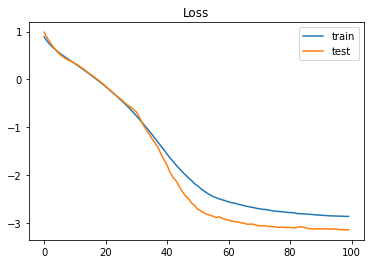

In [38]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

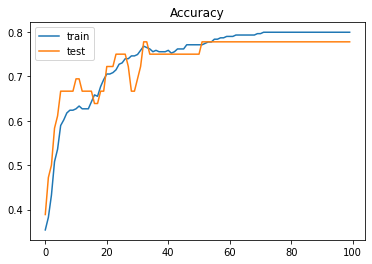

In [39]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [40]:
# Evaluating the model on the training and testing set
score = model.evaluate(xx_train, yy_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(score[1]))
score = model.evaluate(xx_test, yy_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(score[1]))


#Training Accuracy: 95.97%
#Testing Accuracy: 76.34%


#Training Accuracy: 98.77%
#Testing Accuracy: 72.14%


#Training Accuracy: 92.58%
#Testing Accuracy: 85.11%

#Training Accuracy: 84.45%
#Testing Accuracy: 82.98%

#Training Accuracy: 82.54%
#Testing Accuracy: 74.47%

#Training Accuracy: 83.73%
#Testing Accuracy: 80.85%


#Training Accuracy: 84.45%
#Testing Accuracy: 82.98%

#Training Accuracy: 84.21%
#Testing Accuracy: 82.98%


Training Accuracy: 79.94%
Testing Accuracy: 77.78%


Fine tune the parameters to improve classification accuracy - if not then refine the features used - perhaps add weightage somewhere - aim for atleast 80% accuracy 

Generation 15 - Current best internal CV score: 0.7109589041095891

Best pipeline: DecisionTreeClassifier(PolynomialFeatures(CombineDFs(input_matrix, input_matrix), degree=2, include_bias=False, interaction_only=False), criterion=entropy, max_depth=3, min_samples_leaf=18, min_samples_split=16)

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=15,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=50,
               random_state=42, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

Sequence Modeling 


hi, i just wanted to mention, about the modeling of features using sequence models. the current super basic way that I used is modeling chunks of X consecutive frames (so far I used 10frames) computing their mean and standard deviation.
3:05
You can use maybe this function as model. It is within the featureExtractionFunctions.py script




